In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('news_sentiment_analysis.csv')
df.head()

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Source        3500 non-null   object
 1   Author        2512 non-null   object
 2   Title         3500 non-null   object
 3   Description   3500 non-null   object
 4   URL           3500 non-null   object
 5   Published At  3500 non-null   object
 6   Sentiment     3500 non-null   object
 7   Type          3500 non-null   object
dtypes: object(8)
memory usage: 218.9+ KB


In [5]:
df.isnull().sum()

Source            0
Author          988
Title             0
Description       0
URL               0
Published At      0
Sentiment         0
Type              0
dtype: int64

In [6]:
df.duplicated().sum()

737

In [7]:
df.dropna(axis=0, inplace=True)
df=df.drop_duplicates()

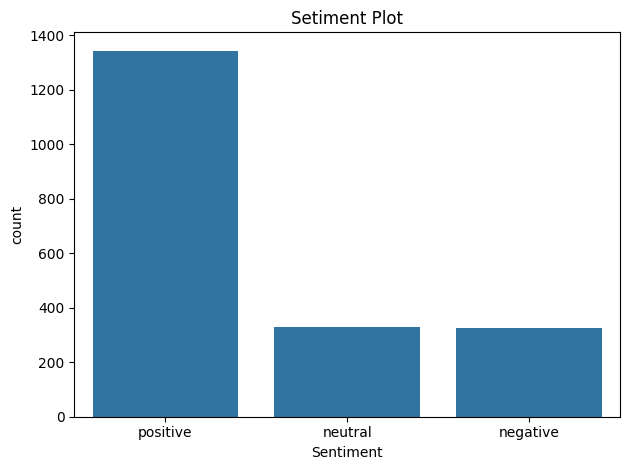

In [8]:
plt.subplot()
sns.countplot(df, x='Sentiment')
plt.title('Setiment Plot')
plt.tight_layout()
plt.show()

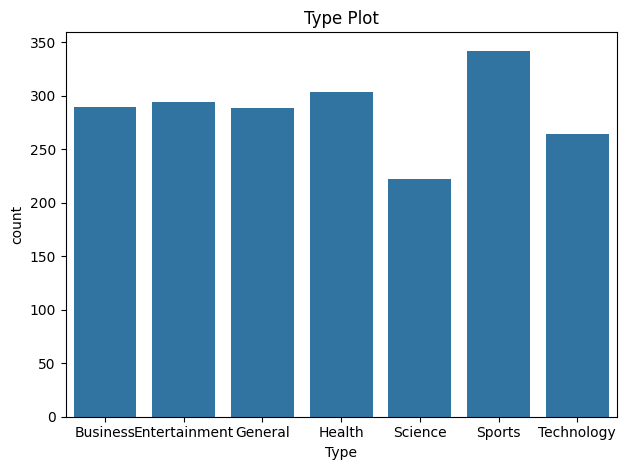

In [9]:
plt.subplot()
sns.countplot(df, x='Type')
plt.title('Type Plot')
plt.tight_layout()
plt.show()

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def textProcessing(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
df['cleaned_description'] = df['Description'].apply(lambda x: textProcessing(x))

In [12]:
df['cleaned_description'] = df['cleaned_description'].astype(str)
texts = df['cleaned_description']
labels = df['Sentiment']

In [13]:
labelEncoder = LabelEncoder()
encoded= labelEncoder.fit_transform(labels)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(texts, encoded, test_size=0.3, random_state=42)

In [15]:
vectorizer = TfidfVectorizer(max_features=5000)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [18]:
rforest = RandomForestClassifier(n_estimators=300)
xgboost = XGBClassifier()

models = [rforest, xgboost]
names = ["Random Forest", "XGBoost"]

In [21]:
index = 0
result = []

for name, model in enumerate(models):
    model.fit(x_train_tfidf, y_train)
    pred = model.predict(x_test_tfidf)
    accuracy = metrics.accuracy_score(y_test, pred)

    result.append(accuracy)
    confusion = metrics.confusion_matrix(y_test, pred)
    print(f'{names[index]} accuracy: {round(accuracy,4)}')
    print(metrics.classification_report(y_test, pred, target_names=labelEncoder.classes_))

    index += 1


Random Forest accuracy: 0.8502
              precision    recall  f1-score   support

    negative       1.00      0.38      0.55        97
     neutral       0.86      0.75      0.80        93
    positive       0.84      0.98      0.90       411

    accuracy                           0.85       601
   macro avg       0.90      0.71      0.75       601
weighted avg       0.87      0.85      0.83       601

XGBoost accuracy: 0.8536
              precision    recall  f1-score   support

    negative       0.80      0.48      0.60        97
     neutral       0.76      0.87      0.81        93
    positive       0.88      0.94      0.91       411

    accuracy                           0.85       601
   macro avg       0.81      0.76      0.78       601
weighted avg       0.85      0.85      0.84       601

